In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
from yellowbrick.text import DispersionPlot

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

import os
import sklearn as SKL
from sklearn.datasets.base import Bunch
from sklearn.cluster import KMeans


In [2]:
#Your data is not set up like the data this subroutine is written to handle.

def load_corpus(path):
    """
    Loads and wrangles the passed in text corpus by path.
    """

    # Check if the data exists, otherwise download or raise
    if not os.path.exists(path):
        raise ValueError((
            "'{}' dataset has not been downloaded, "
            "use the yellowbrick.download module to fetch datasets"
        ).format(path))

    # Read the directories in the directory as the categories.
    categories = [
        cat for cat in os.listdir(path)
        if os.path.isdir(os.path.join(path, cat))
    ]

    files  = [] # holds the file names relative to the root
    data   = [] # holds the text read from the file
    target = [] # holds the string of the category

    # Load the data from the files in the corpus
    for cat in categories:
        for name in os.listdir(os.path.join(path, cat)):
            files.append(os.path.join(path, cat, name))
            target.append(cat)

            with open(os.path.join(path, cat, name), 'r') as f:
                data.append(f.read())


    # Return the data bunch for use similar to the newsgroups example
    return Bunch(
        categories=categories,
        files=files,
        data=data,
        target=target,
    )

In [3]:
#Read in 
corpus_df = pd.read_csv('../FullCorpus/Abstracts_formatted_all.txt',header=None)
data = corpus_df.values
data = data.flatten()
print np.shape(data)


#Vectorize
tfidf  = TfidfVectorizer()
docs   = tfidf.fit_transform(data)

(6196,)


TSNEVisualizer(alpha=0.4,
        ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a18eaf510>,
        classes=None, colormap=None, colors=None, decompose=None,
        decompose_by=None, labels=None, random_state=None)

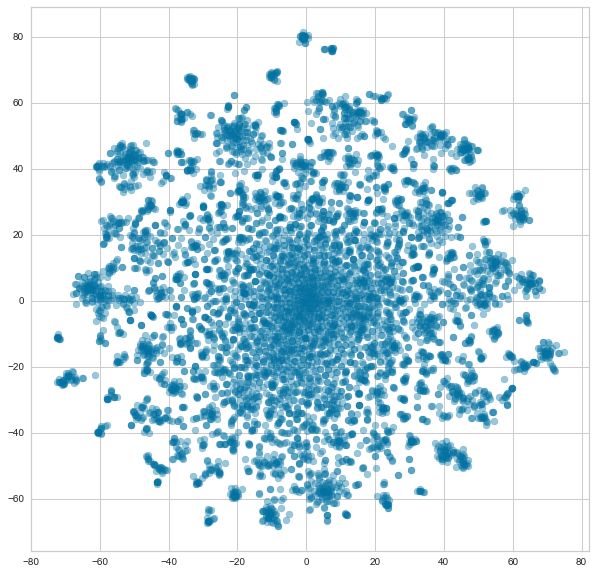

In [31]:
ncluster = 35

clusters = KMeans(n_clusters=ncluster)
clusters.fit(docs)

tsne = TSNEVisualizer(decompose='svd', decompose_by=500,alpha=0.4)
figure(figsize=(10,10))
tsne.fit(docs)#, ["c{}".format(c) for c in clusters.labels_])
#plt.savefig('tsneclusters.png')

In [33]:
order_centroids = clusters.cluster_centers_.argsort()[:, ::-1]

terms = tfidf.get_feature_names()

nterm = 20
termArray = []
for i in range(ncluster):
        print "Cluster:", i
        j = 0
        for ind in order_centroids[i, :nterm]:
            termArray.append(terms[ind])
            print terms[ind]
        print "-----------------"


Cluster: 0
species
native
lineages
parasites
parasite
introduced
migratory
invasive
populations
avian
host
prevalence
invasions
birds
plasmodium
migration
hosts
diversity
invasion
genetic
-----------------
Cluster: 1
sex
sexual
queen
red
asexual
parasites
reproduction
hypothesis
parasite
selection
host
populations
clonal
recombination
coevolution
advantage
females
genetic
evolution
dynamics
-----------------
Cluster: 2
aegypti
aedes
dengue
ae
mosquito
vector
mosquitoes
virus
background
albopictus
zika
competence
chikungunya
populations
zikv
wolbachia
strain
strains
transmission
viruses
-----------------
Cluster: 3
treatment
drug
filariasis
therapy
background
ivermectin
resistance
volvulus
mass
lymphatic
onchocerciasis
elimination
transmission
onchocerca
lf
mda
parasite
drugs
impact
chagas
-----------------
Cluster: 4
interactions
host
coevolution
dynamics
phage
evolution
species
population
populations
ecological
parasite
coevolutionary
spatial
pathogen
effects
model
hosts
parasites
evo

In [ ]:
termArray = np.array(termArray)
print np.shape(termArray)
termArray = termArray.reshape([ncluster,nterm])

In [ ]:
text = [doc.split() for doc in data]

# Choose words whose occurence in the text will be plotted
target_words = ['spillover', 'applied','metapopulation','time','measles']

# Create the visualizer and draw the plot
figure(figsize=(12,12))
visualizer = DispersionPlot(target_words)
visualizer.fit(text)
visualizer.poof()

In [17]:
#The Plan: follow https://tinyurl.com/yavyowbq. First do PCA to get the top 50 components, then do t-sne on these 
#components. 
#Actually, to work with the data from the vectorizer, you will use TruncatedSVD instead.

# Possibly of interest: "Information Retrieval (Salton's Vector Space Model) is that those terms ocurring 
# between 1% and 10% of the documents are the most discriminative ones"

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=500, n_iter=7, random_state=42);
svd_result =svd.fit_transform(docs);

In [28]:
#print 'Explained variation per principal component: {}'.format(svd.explained_variance_ratio_)
print 'Cumulative variation explained by all components: {}'.format(np.sum(svd.explained_variance_ratio_))
svd1 = svd_result[:,0]
svd2 = svd_result[:,1] 
svd3 = svd_result[:,2]

#plt.scatter(svd1,svd3)

fig = plt.figure()
ax = plt.add_subplot(111, projection='3d')
ax.scatter(svd1, svd2, svd3, marker='o')



Cumulative variation explained by all components: 0.41950404725


AttributeError: 'module' object has no attribute 'add_subplot'

<Figure size 432x288 with 0 Axes>

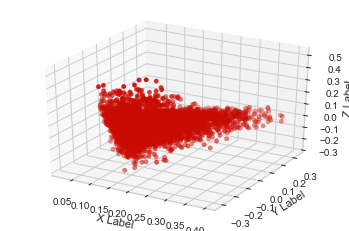

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]



ax.scatter(svd1, svd2, svd3, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
#Find words that occur in between 1 and 10 % of documents. First - they must appear at least 45 times to be in 1% of
#docs. That's a bad measure, but wev. 10% of documents would be at least 450 times. But give that a x10 factor. So, 
#what are the words that appear between 45 and 4500 times?

#That actually didn't seem to make much difference.
text

In [ ]:
#Words in corpus with greatest and least amount of variance in their distribution. Should be in there at least, what,
#10 times?

from nltk.draw import dispersion_plot
dispersion_plot(str(text),
                ['spillover','malaria'],
                ignore_case=True)